In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/r-street-quant-challenge/sample_submission.csv
/kaggle/input/r-street-quant-challenge/train_target.csv
/kaggle/input/r-street-quant-challenge/train_data.csv
/kaggle/input/r-street-quant-challenge/test_data.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/r-street-quant-challenge/train_data.csv')
train_target=pd.read_csv('/kaggle/input/r-street-quant-challenge/train_target.csv')


In [3]:
pd.read_csv('/kaggle/input/r-street-quant-challenge/sample_submission.csv').shape

(10317, 2)

In [4]:
df_test=pd.read_csv('/kaggle/input/r-street-quant-challenge/test_data.csv')

In [5]:
# %pip install sweetviz

In [6]:
# import sweetviz as sv
# rep=sv.analyze(train_df)
# rep.show_html('Analisyis.html')

In [7]:
# %pip  install AutoViz

In [8]:
# from autoviz.AutoViz_Class import AutoViz_Class

In [9]:
# av=AutoViz_Class()
# dk=av.AutoViz('/kaggle/input/r-street-quant-challenge/train_data.csv')


In [10]:
train_df.columns

Index(['Id', 'date', 'open', 'high', 'low', 'close', 'day', 'week', 'SMA_7',
       'SMA_14', 'SMA_21', 'RSI_7', 'RSI_14', 'RSI_21', 'ATR_14', 'bb_mavg',
       'bb_hband', 'bb_lband'],
      dtype='object')

In [11]:
arr=train_target.target.to_numpy()
df2 = pd.DataFrame({'target': arr})
frames = [train_df, df2]
result = pd.concat(frames,axis=1)
result.to_csv('final_train.csv')
print('done')

done


In [12]:
df=pd.read_csv('final_train.csv')
df.head()

,Unnamed: 0,Id,date,open,high,low,close,day,week,SMA_7,SMA_14,SMA_21,RSI_7,RSI_14,RSI_21,ATR_14,bb_mavg,bb_hband,bb_lband,target
0,0,0,2015-01-12 09:15:00+05:30,0.252483,0.249671,0.255665,0.250255,12,3,0.249131,0.246873,0.247927,54.402627,48.236033,45.263488,0.007017,0.247667,0.256181,0.239153,1
1,1,1,2015-01-12 09:30:00+05:30,0.247851,0.246028,0.257602,0.251258,12,3,0.250327,0.247607,0.247838,57.307707,49.928940,46.453986,0.007040,0.247534,0.255730,0.239338,0
2,2,2,2015-01-12 09:45:00+05:30,0.248817,0.248992,0.259178,0.253956,12,3,0.251520,0.248550,0.247840,64.423555,54.263566,49.554022,0.007103,0.247566,0.255858,0.239275,1
3,3,3,2015-01-12 10:00:00+05:30,0.251481,0.249916,0.260682,0.253628,12,3,0.252341,0.248788,0.247855,62.935127,53.655190,49.190342,0.007076,0.247743,0.256385,0.239101,0
4,4,4,2015-01-12 10:15:00+05:30,0.251066,0.250750,0.262421,0.255314,12,3,0.253037,0.249406,0.248103,67.444567,56.362731,51.125779,0.007199,0.248086,0.257337,0.238835,0


In [13]:
df_train=df.drop(['Unnamed: 0'],axis=1)

In [14]:

def clean_data(df_train):
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    imputed_df_train = pd.DataFrame(my_imputer.fit_transform(df_train))
    imputed_df_train.columns = df_train.columns 
    cols_with_missing = [col for col in df_train_copy.columns
                     if df_train_copy[col].isnull().any()]
    print('Number of null value colums after cleaning = ',len(cols_with_missing))
    return imputed_df_train

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [17]:
params_tw = {
        'learning_rate': 0.06853392035787837,
        'reg_lambda': 1.7549293092194938e-05,
        'reg_alpha': 14.68267919457715, 
        'subsample': 0.8031450486786944, 
        'colsample_bytree': 0.170759104940733, 
        'max_depth': 4,
    }

In [18]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['hour'] = df_train['date'].dt.hour
df_train['minute'] =df_train['date'].dt.minute
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year'] = df_test['date'].dt.year
df_test['month'] =df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['hour'] = df_test['date'].dt.hour
df_test['minute'] = df_test['date'].dt.minute

In [19]:
num_cols = list(set(df_train.columns)-{'Id','date','day', 'week','year','month','hour','minute'})
cat_cols = list(set(df_train.columns)-set(num_cols)-{'Id','date'})
print(cat_cols)

['week', 'hour', 'month', 'year', 'day', 'minute']


['SMA_21',
 'close',
 'SMA_14',
 'bb_mavg',
 'high',
 'low',
 'open',
 'SMA_7',
 'bb_lband']

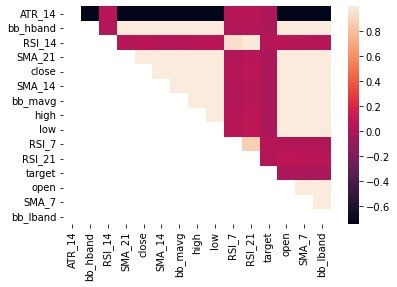

In [20]:
import seaborn as sns
corr_matrix = df_train[num_cols].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
sns.heatmap(upper)
to_drop = [column for column in upper.columns if any(upper[column] > 0.999)]
to_drop

In [21]:
df_train.head()

,Id,date,open,high,low,close,day,week,SMA_7,SMA_14,...,RSI_21,ATR_14,bb_mavg,bb_hband,bb_lband,target,year,month,hour,minute
0,0,2015-01-12 09:15:00+05:30,0.252483,0.249671,0.255665,0.250255,12,3,0.249131,0.246873,...,45.263488,0.007017,0.247667,0.256181,0.239153,1,2015,1,9,15
1,1,2015-01-12 09:30:00+05:30,0.247851,0.246028,0.257602,0.251258,12,3,0.250327,0.247607,...,46.453986,0.007040,0.247534,0.255730,0.239338,0,2015,1,9,30
2,2,2015-01-12 09:45:00+05:30,0.248817,0.248992,0.259178,0.253956,12,3,0.251520,0.248550,...,49.554022,0.007103,0.247566,0.255858,0.239275,1,2015,1,9,45
3,3,2015-01-12 10:00:00+05:30,0.251481,0.249916,0.260682,0.253628,12,3,0.252341,0.248788,...,49.190342,0.007076,0.247743,0.256385,0.239101,0,2015,1,10,0
4,4,2015-01-12 10:15:00+05:30,0.251066,0.250750,0.262421,0.255314,12,3,0.253037,0.249406,...,51.125779,0.007199,0.248086,0.257337,0.238835,0,2015,1,10,15


In [22]:
df_train["kfold"] = -1
kf = model_selection.KFold(n_splits=15, shuffle=True, random_state=42)
for fld, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fld
df_train.to_csv("train_folds.csv", index=False)
object_col = [col for col in df_train.columns if 'cat' in col]
not_req_tw=[]
not_req_tw.append('Id')
not_req_tw.append('kfold')
not_req_tw.append('date')
not_req_tw.append('target')
not_req_tw.append('day')
not_req_tw.append('week')
req_features_tw=[col for col in df_train.columns if col not in not_req_tw]
df_test=df_test[req_features_tw]
sample_submission=pd.read_csv("/kaggle/input/r-street-quant-challenge/sample_submission.csv")
final_test_predictions = []
final_valid_predictions = {}
best_pred={'val':-0.5,'dat':sample_submission}
scores = []
final_pred=[] #save your predictions in this list
for fld in range(15):
    xtrain=df_train[df_train.kfold!=fld].reset_index(drop=True)
    xvalid=df_train[df_train.kfold==fld].reset_index(drop=True)
    ytrain=xtrain.target
    yvalid=xvalid.target
    xtest= df_test.copy()
    xtrain=xtrain[req_features_tw]
    valid_ids = xvalid.Id.values.tolist()
    xvalid=xvalid[req_features_tw]
    normalizer = preprocessing.Normalizer().fit(xtrain)
    xtrain = preprocessing.normalize(xtrain, norm='l2')
    xtest=normalizer.transform(xtest)
    xvalid=normalizer.transform(xvalid)
    xtrain=pd.DataFrame(xtrain,columns=req_features_tw)
    xvalid=pd.DataFrame(xvalid,columns=req_features_tw)
    xtest=pd.DataFrame(xtest,columns=req_features_tw)
    model = XGBRegressor( objective='binary:hinge',random_state=fld,
        n_jobs=4,
        n_estimators=500,**params_tw)
    model.fit(xtrain, ytrain, early_stopping_rounds=300, eval_set=[(xvalid, yvalid)], verbose=100)
    
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_test_predictions.append(test_preds)
    final_valid_predictions.update(dict(zip(valid_ids, preds_valid)))
    rmse = roc_auc_score(yvalid, preds_valid)
    print(fld, rmse)
    scores.append(rmse)
    if(rmse>best_pred['val']):
        best_pred['val']=rmse
        best_pred['dat']=test_preds
print(np.mean(scores), np.std(scores))
final_valid_predictions = pd.DataFrame.from_dict(final_valid_predictions, orient="index").reset_index()
final_valid_predictions.columns = ["Id", "target"]
final_valid_predictions.to_csv("train_pred_2.csv", index=False)
sample_submission.target = np.mean(np.column_stack(final_test_predictions), axis=1)
sample_submission.columns = ["Id", "target"]
sample_submission.to_csv("sample_submission.csv", index=False)

[0]	validation_0-error:0.49412
[100]	validation_0-error:0.49412
[200]	validation_0-error:0.49177
[300]	validation_0-error:0.49706
[400]	validation_0-error:0.49529
[499]	validation_0-error:0.49059
0 0.5097314507198228
[0]	validation_0-error:0.49294
[100]	validation_0-error:0.49294
[200]	validation_0-error:0.48941
[300]	validation_0-error:0.49353
[400]	validation_0-error:0.48471
[499]	validation_0-error:0.48000
1 0.5186846928661214
[0]	validation_0-error:0.50000
[100]	validation_0-error:0.50000
[200]	validation_0-error:0.49882
[300]	validation_0-error:0.49706
[400]	validation_0-error:0.50353
[499]	validation_0-error:0.50765
2 0.5052941176470588
[0]	validation_0-error:0.50000
[100]	validation_0-error:0.50000
[200]	validation_0-error:0.49706
[300]	validation_0-error:0.50000
[400]	validation_0-error:0.50118
[499]	validation_0-error:0.49412
3 0.5058823529411764
[0]	validation_0-error:0.49000
[100]	validation_0-error:0.49000
[200]	validation_0-error:0.49177
[300]	validation_0-error:0.48647
[4

In [23]:
sample_submission['target'] = sample_submission['target'].apply(lambda x: 0 if x <= 0.6 else 1)
sample_submission.columns = ["Id", "target"]
sample_submission.to_csv("submission.csv", index=False)
